In [33]:
from pandas import read_csv 
import numpy as np


In [34]:
df = read_csv('/content/sample_data/international-airline-passengers.csv', usecols = [1])

In [35]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [36]:
values = df.values.astype('float32')
values.shape

(144, 1)

In [37]:
train_size = int((values.shape[0]*0.67))
test_size = values.shape[0] - train_size
train_size, test_size

(96, 48)

In [38]:
train_data = values[0:train_size]
test_data = values[train_size:]
test_data

array([[315.],
       [301.],
       [356.],
       [348.],
       [355.],
       [422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.],
       [432.]], dtype=float32)

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [40]:
train = scaler.fit_transform(train_data)
test = scaler.fit_transform(test_data)

In [41]:
def create_dataset(data, k):
  dataX,dataY = [],[]
  for i in range(data.shape[0]-k):
    x = data[i:i+k]
    y = data[i+k, 0]
    dataX.append(x)
    dataY.append(y)
  return np.array(dataX), np.array(dataY)

In [23]:
create_dataset(test, 12)

(array([[[0.04361373],
         [0.        ],
         [0.17133951],
         [0.1464175 ],
         [0.16822433],
         [0.37694705],
         [0.51090336],
         [0.51713395],
         [0.3208723 ],
         [0.1433022 ],
         [0.01246107],
         [0.1090343 ]],
 
        [[0.        ],
         [0.17133951],
         [0.1464175 ],
         [0.16822433],
         [0.37694705],
         [0.51090336],
         [0.51713395],
         [0.3208723 ],
         [0.1433022 ],
         [0.01246107],
         [0.1090343 ],
         [0.12149537]],
 
        [[0.17133951],
         [0.1464175 ],
         [0.16822433],
         [0.37694705],
         [0.51090336],
         [0.51713395],
         [0.3208723 ],
         [0.1433022 ],
         [0.01246107],
         [0.1090343 ],
         [0.12149537],
         [0.0529595 ]],
 
        [[0.1464175 ],
         [0.16822433],
         [0.37694705],
         [0.51090336],
         [0.51713395],
         [0.3208723 ],
         [0.1433022 ],
  

In [42]:
look_back=12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [43]:
trainX= np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX= np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX.shape

(84, 12, 1)

In [44]:
#Setting up the RNN Model
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense 

In [45]:
model = Sequential()
model.add(SimpleRNN(4, input_shape = (look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs = 100, batch_size=1)

Epoch 1/100
84/84 [==============================] - 1s 3ms/step - loss: 0.0190
Epoch 2/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 3/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 4/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 5/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 6/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 7/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 8/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 9/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 10/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 11/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 12/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 13/100
84/84 [=================

In [48]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict).ravel()

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()


In [51]:
test_true = scaler.inverse_transform([testY]).ravel()
train_true = scaler.inverse_transform([trainY]).ravel()
testPredict.shape, test_true.shape

((36,), (36,))

In [52]:
from matplotlib import pyplot as plt

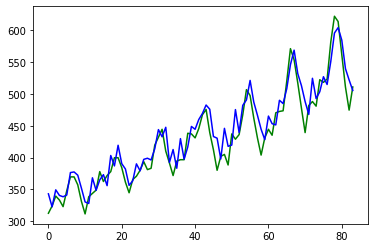

In [54]:
plt.plot(train_true, c='g')
plt.plot(trainPredict, c='b')
plt.show()

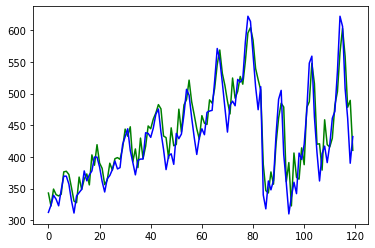

In [56]:
combinedPredicted = np.concatenate((trainPredict, testPredict))
combinedTrue = np.concatenate((train_true, test_true))
plt.plot(combinedPredicted, c='g')
plt.plot(combinedTrue, c='b')
plt.show()